# Project 2

# 1 data extraction

In [1]:
# import packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import urllib3
urllib3.disable_warnings()

In [2]:
# load a page
npage = 400
links = []

print('Getting Job urls')
print()
agent = {
    "User-Agent":'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'referer':'https://www.google.com/'
}
for i in range(0,npage):
    url = "https://www.indeed.com/jobs?q=python&start="+str(i)+"0"
    search = requests.get(url, headers=agent)
    
    soup = BeautifulSoup(search.content,'html.parser')
    for link in soup.find_all('div',attrs={'class':'jobsearch-SerpJobCard'}):
        link = link.find('a')
        links.append('https://www.indeed.com'+link.get('href'))
    print('.',end='')
    time.sleep(2)
    
    
print()
print('complete')

Getting Job urls

................................................................................................................................................................................................................................................................................................................................................................................................................
complete


In [3]:
links

['https://www.indeed.com/company/Wavicle-Data-Solutions/jobs/Senior-ETL-Developer-Python-7a57f353975560d8?fccid=c6f867b4166b93af&vjs=3',
 'https://www.indeed.com/rc/clk?jk=2fa2f50cbb3d9fc8&fccid=b50af1be25b2ba50&vjs=3',
 'https://www.indeed.com/rc/clk?jk=35e33ea7f331f341&fccid=6e2212a27883d692&vjs=3',
 'https://www.indeed.com/rc/clk?jk=f3ffbe46b2800633&fccid=6c6be4ac01722b08&vjs=3',
 'https://www.indeed.com/rc/clk?jk=f532e6d95e209f41&fccid=e9a06afb30874a83&vjs=3',
 'https://www.indeed.com/rc/clk?jk=fbb24db15d376118&fccid=de71a49b535e21cb&vjs=3',
 'https://www.indeed.com/rc/clk?jk=f58c4bcae8073893&fccid=71fc733edf2e5163&vjs=3',
 'https://www.indeed.com/rc/clk?jk=8ef9be1c8cfe3d99&fccid=0f4e35d9d1b07bf7&vjs=3',
 'https://www.indeed.com/rc/clk?jk=1e00f9cb250a73e4&fccid=9129ee712d1ee91f&vjs=3',
 'https://www.indeed.com/rc/clk?jk=081be0d6e025977d&fccid=b85c5070c3d3d8c8&vjs=3',
 'https://www.indeed.com/rc/clk?jk=ce09dba9e040bd06&fccid=6e2212a27883d692&vjs=3',
 'https://www.indeed.com/rc/clk?j

In [4]:
links = [x for x in links if x.count('pagead')==0]
total_link = len(links)
print(total_link)

1502


In [6]:
#output = pd.DataFrame(columns=words.keys())
title = []
location = []
job_description = []

for job in links:
        # get the content 
        page = requests.get(job)
        soup = BeautifulSoup(page.text, 'html.parser')
        
        # find the job title
        try:
            tit = soup.find(class_='jobsearch-JobInfoHeader-title')
            tit = tit.text
            title.append(tit)
        except:
            title.append("")
            pass
        
        # get the location of the job
        try:
            loca = soup.find(class_ = 'jobsearch-InlineCompanyRating')
            loca = loca.find_all('div')[-1].text
            location.append(loca)
        except:
            location.append("")
            pass
        try:
            # convert job description to lower case
            desc = soup.find(class_ = 'jobsearch-jobDescriptionText')
            desc = desc.get_text(" ").lower()
            job_description.append(desc)
        except:
            job_description.append("")

In [7]:
print(len(title))
print(len(location))
print(len(job_description))

1502
1502
1502


# 2 data preprocessing

# 2.1 Combine data into Dataframe

In [8]:
# combine the data we extract to dataframe
from pandas import DataFrame
my_list = list(zip(title,location,job_description))
df = DataFrame(my_list,columns=['title','location','job_description'])
print(df)

                                                  title  \
0                          Sr.ETL Developer with Python   
1                     Junior Flight Operations Engineer   
2                                      Python Developer   
3                      Acceptance Test Group Supervisor   
4                                      Python Developer   
5        Entry Level - Client Facing Technology Support   
6                           Customer Advocate Associate   
7                               Computational Physicist   
8                     Software Engineer, Retail Systems   
9                       Python Engineer (United Income)   
10                                         Test Analyst   
11                                 SQL Server Developer   
12                                        Data Engineer   
13                        Software Development Engineer   
14    Software Engineer with background in ML/NLP: F...   
15                                    NodeJS Programmer 

In [11]:
# # delete the observation if the title is null
# update_df = df[df.title != '']
# print(update_df)
update_df = df

In [12]:
len(update_df)

1502

# 2.2 Delete Duplication 

In [13]:
# delete duplication accroding to job_description
update_df.drop_duplicates('job_description','first')

,title,location,job_description
0,Sr.ETL Developer with Python,Remote,about wavicle : wavicle data solutions is buil...
1,Junior Flight Operations Engineer,"Greenbelt, MD 20770",about us: \n \n \n pearl river technologies is...
2,Python Developer,Remote,duration & type: 3-4 months contract with a m...
3,Acceptance Test Group Supervisor,"Ashburn, VA",description:\n job title: acceptance test grou...
4,Python Developer,"New York, NY 10003","click ""apply for this job"" below to submit you..."
5,Entry Level - Client Facing Technology Support,California,introduction \nsoftware developers at ibm are ...
6,Customer Advocate Associate,"Washington, DC 20036",ordway is on a mission to build the world’s mo...
7,Computational Physicist,"College Park, MD 20740",ionq is developing the world's first fully-exp...
8,"Software Engineer, Retail Systems","New York, NY","here at warby parker, we're searching for a to..."
9,Python Engineer (United Income),"McLean, VA","mclean 2 (19052), united states of america, mc..."


# 2.3 Split city and state

In [14]:
 # split location into city and state
    # new data frame with split value columns 
new = update_df["location"].str.split(", ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
update_df["city"]= new[0] 
  
# making separate last name column from new data frame 
update_df["state"]= new[1].str[:2]
print(update_df)

                                                  title  \
0                          Sr.ETL Developer with Python   
1                     Junior Flight Operations Engineer   
2                                      Python Developer   
3                      Acceptance Test Group Supervisor   
4                                      Python Developer   
5        Entry Level - Client Facing Technology Support   
6                           Customer Advocate Associate   
7                               Computational Physicist   
8                     Software Engineer, Retail Systems   
9                       Python Engineer (United Income)   
10                                         Test Analyst   
11                                 SQL Server Developer   
12                                        Data Engineer   
13                        Software Development Engineer   
14    Software Engineer with background in ML/NLP: F...   
15                                    NodeJS Programmer 

# 2.4 Categorize job titles into 8 categories

In [15]:
# 'developer', 'analyst', 'engineer', 'associate','tutor','manager','scientist','consultant'
import numpy as np
def sev_cate(cate):
    name = cate
    my_list = []
    for i in update_df['title']:
        print(i.lower())
        indicator = 0
        if cate in i.lower():
            indicator += 1
            my_list.append(1)
        else:
            my_list.append(0)
    update_df[name] = np.array(my_list)

sev_categories = ['developer', 'analyst', 'engineer', 'associate','tutor','manager','scientist','consultant']
for i in sev_categories:
    sev_cate(i)
update_df['total'] = update_df.loc[:,'developer':'consultant'].sum(axis=1)
print(update_df)

sr.etl developer with python
junior flight operations engineer
python developer
acceptance test group supervisor
python developer
entry level - client facing technology support
customer advocate associate
computational physicist
software engineer, retail systems
python engineer (united income)
test analyst
sql server developer
data engineer
software development engineer
software engineer with background in ml/nlp: full-time position
nodejs programmer
associate research scientist for algorithm development/validation
agile development, associate
energy analyst
python developer
python developer back end
full stack developer ( python ) - remote usa
quantitative sports researcher
back end developer
backend developer intern
junior python developer
big data solutions associate
python django developer
qa manual tester
cybersecurity analyst

software engineer intermediate
associate systems engineer
senior level python developer
data analyst
crypto quantitative trading developer
operations assoc

mid-level cyber threat hunter
data analytics (part-time), washington, dc, us, id#19038
junior data analyst
senior operational analyst
software engineer
python developer
jr software engineer
asst store mgr - operation
senior python & django developer
python engineer (software systems development)
entry level software engineer - java
node.js developer
analytic methodologist
software developer - python
parks gis coordinator (13946, grade 28)
sr. data scientist
data analyst
software engineer, backend
l1 support
2021 associate cloud consultant - university (iad)
junior java developer
data analayst
junior application developer, financial applications
python developer
new graduate for junior level positions
automated testing lead

python developer teaching assistant (finance sector) - george washington university
remote role: full time- software developers - destributed systems
trading analytics model development senior
junior software developer
junior java developer
software developer ii (py

associate software developer
2021 software engineer summer intern
software engineer (python dev) - fp level
vice president of information technology
software engineering intern
python developer
data scientist
data analyst
manager, digital analytics - remote
sap ns2 technical internship - virtual
remote role: full time- software developers - destributed systems
software packaging engineer
data analyst
it support specialist - remote
2021 college hires
data scientist
machine learning engineer
junior data engineer
python/django developer
python developer - financial services
tableau data visualization analyst
freelance web developer
software engineer - new college grad
c++ / python developer
university grad software engineer
junior software developer (internship)
quantitative trader
entry level processor & chip design: 2021
operations analyst
director of performance analytics and reporting
director of performance analytics and reporting
jr. software quality engineer - media
sr. data analys
























































































































































































































research associate, industry research, technology
software engineer intern
data analyst intern
business development associate - strategy analytics
embedded software engineer
developer
it operations strategist
full stack software engineer (all levels)
python engineer
operations analyst, payment integrity






investment analyst
data & insights analyst
cloud engineer
data engineer
full stack software development engineer - aws appconfig
software engineer, backend
sr. python developer
ux engineering internship, search and recommendations - summer 2021
data analyst (first team)
software engineer intern– 6 months internship


research associate, industry research, technology
software engineer intern
data analyst intern
business development associate - strategy analytics
embedded

data analyst
associate software developer
security engineer, threat actor analysis
software engineering internship - nyc
statistician

bioinformatics scientist
software engineer- hbcu connect
jr. snap mdr analyst level 1
aws devops with python
mid level python/c# developer for hedge fund
front end developer
front end engineer
data scientist
part-time assessment of elevation products from spaceborne sensors
entry level data analyst
sr. python developer
cloud applications- senior associate
sre/support engineer
software engineering intern
revit manager
data scientist
junior front end / full stack software engineer
penetration tester (red team)
functional/data analyst
python developer
lead solutions consultant - health
content engineer - arabic specialist
software development engineer / aws regions
cleared data scientist
python developer
quality assurance architect/lead
biomedical data scientist - summer 2021 internship
devops engineer
forward deployed data scientist
health informatics dat





























































instructors - summer stem classes
frm analyst
rigging artist
python developer
data associate
software engineer, internship
university associate
python/scala developer
senior computational social scientist
trading operations engineer







devops engineer intern
back end developer with public trust
revit manager
data scientist
sr java developer
software tester
python software engineer
data analytics internship, technology & service providers (t&sp) research
python api engineer (opt/h4 ead only)
python-developers


devops engineer intern
back end developer with public trust


















































































































































sr.etl developer with python
junior flight operations engineer
python developer
acceptance test group supervisor
python developer
entry level - client facing technology support
customer advocate associate
computati

In [16]:
# 'developer', 'analyst', 'engineer', 'associate','tutor','manager'
update_df['other'] =(update_df.total == 0).map({True:1, False:0})
del update_df['total']
print(update_df)
print(update_df[update_df['other']==1])

                                                  title  \
0                          Sr.ETL Developer with Python   
1                     Junior Flight Operations Engineer   
2                                      Python Developer   
3                      Acceptance Test Group Supervisor   
4                                      Python Developer   
5        Entry Level - Client Facing Technology Support   
6                           Customer Advocate Associate   
7                               Computational Physicist   
8                     Software Engineer, Retail Systems   
9                       Python Engineer (United Income)   
10                                         Test Analyst   
11                                 SQL Server Developer   
12                                        Data Engineer   
13                        Software Development Engineer   
14    Software Engineer with background in ML/NLP: F...   
15                                    NodeJS Programmer 

In [17]:
print(update_df[update_df['other']==1])

                                                  title  \
3                      Acceptance Test Group Supervisor   
5        Entry Level - Client Facing Technology Support   
7                               Computational Physicist   
15                                    NodeJS Programmer   
22                       Quantitative Sports Researcher   
28                                     QA Manual Tester   
30                                                        
45                               AWS Cloud Practitioner   
47    Virtual Technology Security Internships, Sprin...   
50                           Incident Response (Tier 2)   
51                                                        
53                                      Content Creator   
63                           State Health Analytics SME   
65                                Research Psychologist   
67                             Vulnerability Researcher   
72                                         Statistician 

In [18]:
# create categories columns
import numpy as np
categories = []
partial_df = update_df.loc[:,'developer':'consultant']
my_list = np.array(partial_df)
col = list(i for i in partial_df.columns)
start = 0
for i in my_list:
    count = 0
    for x in i:
        if x == 1:
            categories.append(col[count])
            break
        count+=1
    if count == len(i):
        categories.append('other')
update_df['categories'] = np.array(categories)

# 2.5 Find other programming languages

In [19]:
# what's other related programming language
language = ['sql','oracle','java','swift',' r ',' sas ','ruby','matlab','scala']
def other_language(lang):
    my_list = []
    for i in update_df['job_description']:
        if lang in i:
            my_list.append(1)
        else:
            my_list.append(0)
    update_df[lang] = np.array(my_list)

for i in language:
    other_language(i)

In [20]:
print(update_df)

                                                  title  \
0                          Sr.ETL Developer with Python   
1                     Junior Flight Operations Engineer   
2                                      Python Developer   
3                      Acceptance Test Group Supervisor   
4                                      Python Developer   
5        Entry Level - Client Facing Technology Support   
6                           Customer Advocate Associate   
7                               Computational Physicist   
8                     Software Engineer, Retail Systems   
9                       Python Engineer (United Income)   
10                                         Test Analyst   
11                                 SQL Server Developer   
12                                        Data Engineer   
13                        Software Development Engineer   
14    Software Engineer with background in ML/NLP: F...   
15                                    NodeJS Programmer 

# 2.6 Find information on necessary skill and personality

In [21]:
skill = {
    'data_analyze':['analy','numpy','pandas','matplotlib','sql','data','hadoop','spark'],
    'data_extract':['xml', 'json','data extraction','scrapy','selenium'],
    'machine_learning':['tensorflow','pytorch','scikit','nl','keras',' ai ','machine learning'],
    'web_develop':['django','flask','tornado','web']
}
# 'team_work','detail','self-motivation','initiative','problem solving','time management','communication'
personality = {
    'team_work':['collaborat','team'],
    'detail':['detail'],
    'self-motivation':['self-motivation'],
    'initiative':['initiative'],
    'problem solving':['problem solving'],
    'time management':['time management'],
    'communication':['communicat']
}


In [22]:
def find_dic(dic):
    for name in dic:
        my_list = []
        for job_de in update_df['job_description']:
            count = 0
            for ele in dic[name]:
                if ele in job_de:
                    count+=1
            if count != 0:
                my_list.append(1)
            else:
                my_list.append(0)
        update_df[name] = np.array(my_list)  

find_dic(skill)
find_dic(personality)

In [23]:
print(update_df)

                                                  title  \
0                          Sr.ETL Developer with Python   
1                     Junior Flight Operations Engineer   
2                                      Python Developer   
3                      Acceptance Test Group Supervisor   
4                                      Python Developer   
5        Entry Level - Client Facing Technology Support   
6                           Customer Advocate Associate   
7                               Computational Physicist   
8                     Software Engineer, Retail Systems   
9                       Python Engineer (United Income)   
10                                         Test Analyst   
11                                 SQL Server Developer   
12                                        Data Engineer   
13                        Software Development Engineer   
14    Software Engineer with background in ML/NLP: F...   
15                                    NodeJS Programmer 

# 2.7 Find salary information from job description

In [24]:
# get information for salary
import re
from re import sub
from decimal import Decimal
salary = []
for i in update_df['job_description']:
    if 'pay' in i or 'salary' in i:
        if 'pay' in i:
            index = i.find('pay')
        else:
            index = i.find('salary')
        string = i[index:index+60]
        sa_list = re.findall(r"(?:\${1}[,\d]+.?\d)",string)
        # from money formate to decimal
        decimal = []
        for i in sa_list:
            money = Decimal(sub(r'[^\d.]', '', i))
            # convert hourly to annually 
            if money < 500.0:
                # people work 2000 hours per year
                money = money*2000
            decimal.append(money)
        
        if sa_list != []:
            salary.append(decimal[0:2])
        else:
            salary.append(0)
    else:
        salary.append(0)
print(len(salary))

1502


In [25]:
# split salary into minimium and maxium
mini = []
maxi = []
for i in salary:
    if i == 0:
        mini.append(0)
        maxi.append(0)
    else:
        if len(i)==2:
            mini.append(i[0])
            maxi.append(i[1])
        else:
            mini.append(i[0])
            maxi.append(0)
print(len(mini))
print(len(maxi))
update_df['minimum_salary'] = np.array(mini) 
update_df['maximium_salary'] = np.array(maxi) 

1502
1502


In [26]:
print(update_df)

                                                  title  \
0                          Sr.ETL Developer with Python   
1                     Junior Flight Operations Engineer   
2                                      Python Developer   
3                      Acceptance Test Group Supervisor   
4                                      Python Developer   
5        Entry Level - Client Facing Technology Support   
6                           Customer Advocate Associate   
7                               Computational Physicist   
8                     Software Engineer, Retail Systems   
9                       Python Engineer (United Income)   
10                                         Test Analyst   
11                                 SQL Server Developer   
12                                        Data Engineer   
13                        Software Development Engineer   
14    Software Engineer with background in ML/NLP: F...   
15                                    NodeJS Programmer 

# 3 Data visualization

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# 3.1 How the jobs are distributed?

Text(0, 0.5, 'Frequency')

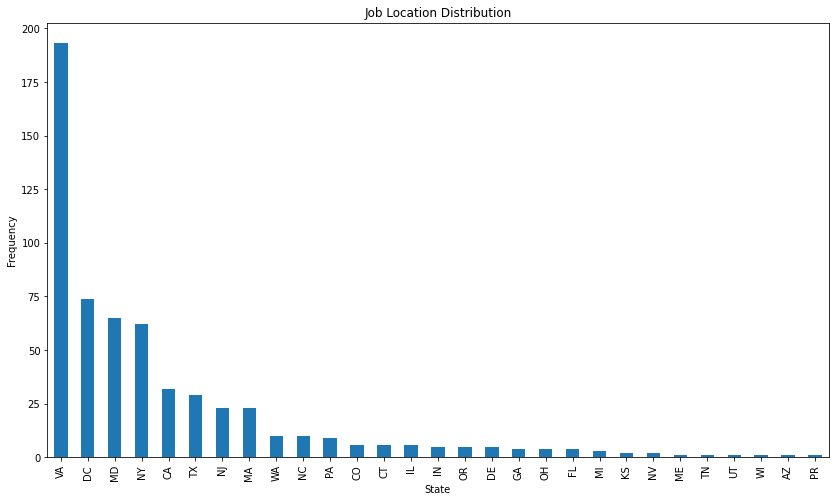

In [28]:
# bar graph will show how the job is distributed
ax = update_df['state'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Job Location Distribution")
ax.set_xlabel("State")
ax.set_ylabel("Frequency")

# 3.2 How's the salary for people who know python?

In [29]:
# Annual Salary
def stat(col): 
    mini = update_df[col][update_df[col]!=0].min()
    maxi = update_df[col][update_df[col]!=0].max()
    median = update_df[col][update_df[col]!=0].median()
    stat = [int(mini),int(maxi),median]
    return stat
min_inf = stat('minimum_salary')
max_inf = stat('maximium_salary')
cars = {'Minimium salary': min_inf,
        'Maximium salary': max_inf}

salary_information = pd.DataFrame(cars, columns = ['Minimium salary', 'Maximium salary'], index=['min','max','median'])

print (salary_information)

        Minimium salary  Maximium salary
min              2000.0          44000.0
max            616000.0         300000.0
median          94032.5         120000.0


# 3.3 What kind of jobs did people who know python end up doing?

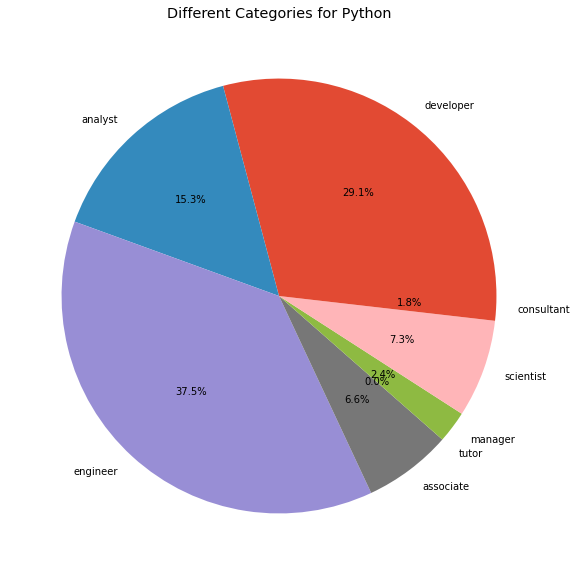

In [44]:
# Pie chart 
labels = list(i for i in update_df.loc[:,'developer':'consultant'].columns)
# total for every categories
total = list(update_df.loc[:,'developer':'consultant'].sum())

fig = plt.figure(figsize =(10, 10)) 
plt.tick_params(axis='x', labelsize=8)  
plt.pie(total,labels=labels, autopct='%1.1f%%')
title = 'Different Categories for Python'
plt.title(title)
plt.show()

# 3.4 What's the main work content of people who know python?

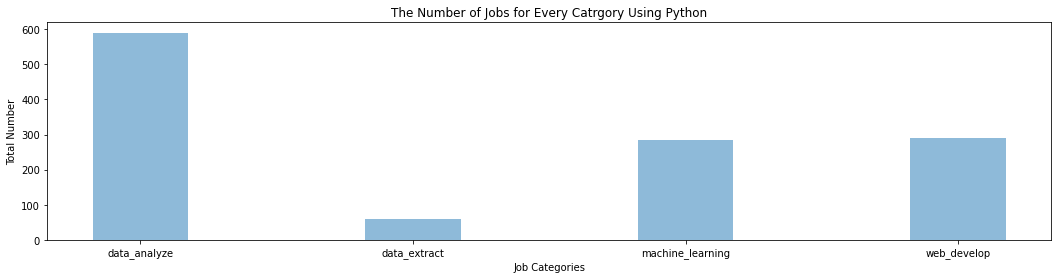

In [30]:
# bar graph for skill 'data_analyze':['analytic','analyze','numpy','pandas','matplotlib','sql','data','hadoop','spark'],
#     'data_extract':['xml', 'json','data extraction'],
#     'machine_learning':['tensorflow','pytorch','scikit','nl','keras','ai','machine learning'],
#     'web_develop':['django','flask','tornado','web']


labels1 = list(i for i in update_df.loc[:,'data_analyze':'web_develop'].columns)
total1 = list(update_df.loc[:,'data_analyze':'web_develop'].sum())

fig = plt.figure(figsize=(18,4))     
plt.bar(labels1, total1, align='center', alpha=0.5, width=0.35)
plt.xlabel("Job Categories")
plt.ylabel("Total Number")
title = 'The Number of Jobs for Every Catrgory Using Python'
plt.title(title)
plt.show()

# 3.5 What's the required personality for different job category?

In [32]:
# according to different categories, we want to analyze the personality
new_df = update_df[['categories','team_work','detail','self-motivation','initiative','problem solving','time management','communication']]
s=new_df['team_work'].groupby(new_df['categories']).sum()
c_p = pd.DataFrame(s)
for i in new_df.iloc[:,2:].columns:
    new=new_df[i].groupby(new_df['categories']).sum().tolist()
    c_p[i] = new
c_p

,team_work,detail,self-motivation,initiative,problem solving,time management,communication
categories,,,,,,,
analyst,76,32,1,14,21,5,63
associate,29,19,0,11,15,1,24
consultant,7,5,0,3,1,0,9
developer,123,30,0,20,7,6,84
engineer,180,43,0,12,38,8,85
manager,13,4,0,6,3,0,9
other,118,45,2,22,23,3,94
scientist,31,4,0,6,1,0,24


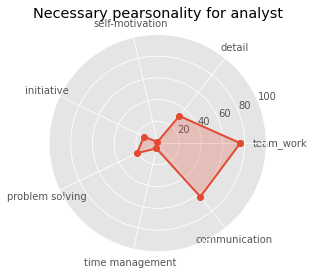

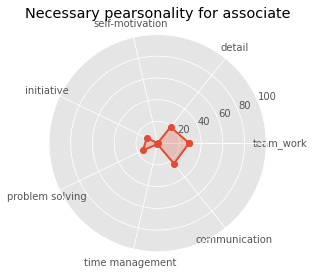

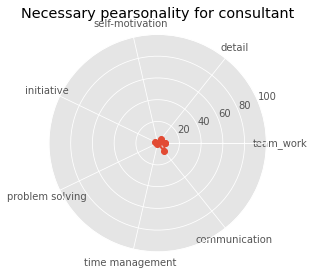

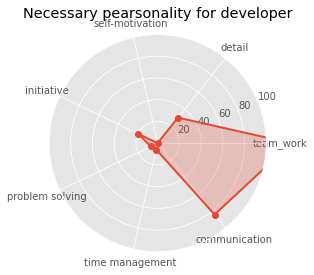

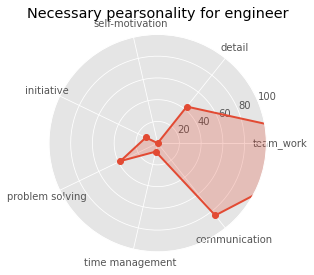

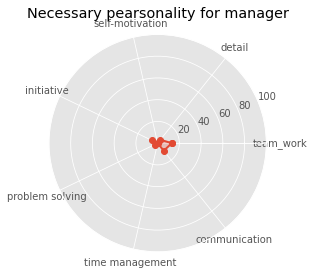

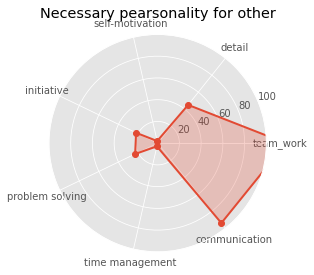

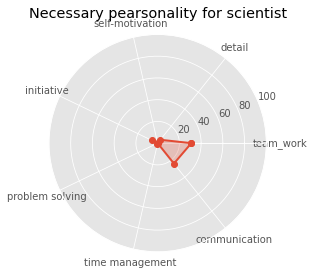

In [39]:
# use ggplot
plt.style.use('ggplot')
feature = [i for i in c_p.iloc[:,0:].columns]

index = list(c_p.index)

for i in range(len(index)):
    values = list(c_p.iloc[i,:].values)
    N = len(values)
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)

    # to close the circle
    values=np.concatenate((values,[values[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    # draw line graph
    ax.plot(angles, values, 'o-', linewidth=2)
    # fill color
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, feature)
    # define the size
    ax.set_ylim(0,100)
    # add title
    title = 'Necessary pearsonality for '+ index[i]
    plt.title(title)
    ax.grid(True)
    plt.show()



In [40]:
!pip install wordcloud

In [41]:
# try to know what personality is the most important
# wordCloud graph 

from wordcloud import WordCloud
string =''

for i in new_df.iloc[:,1:].columns:
    for x in range(new_df[i].sum()):
        string = string +' ' + i

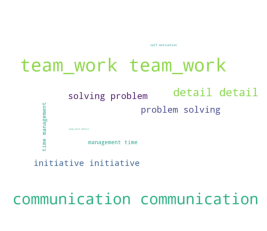

In [42]:
f = string
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(f)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 3.6 Except python, what language people should learn to increase their core competitiveness?

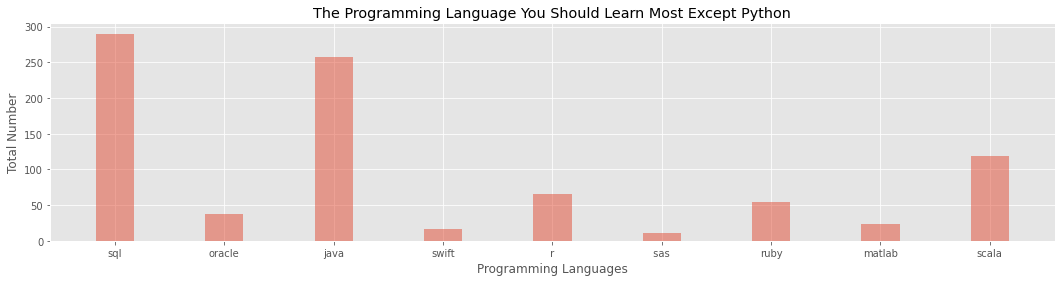

In [43]:
# except python, what language people should learn to increase their core competitiveness
# ['sql','oracle','java','swift',' r ',' sas ','ruby','matlab','scala']
labels1 = list(i for i in update_df.loc[:,'sql':'scala'].columns)
total1 = list(update_df.loc[:,'sql':'scala'].sum())

fig = plt.figure(figsize=(18,4))     
plt.bar(labels1, total1, align='center', alpha=0.5, width=0.35)
plt.xlabel("Programming Languages")
plt.ylabel("Total Number")
title = 'The Programming Language You Should Learn Most Except Python'
plt.title(title)
plt.show()